# TP Théorie et Codage de l'information 

## Moncef REJEB SFAR 

## Lab 3

### Question 1
Pour cette question, j'ai crée deux vecteurs suivant une distribution normale (par exemple) de taille 30

Le but est de calculer l'information mutuelle entre ces deux vecteurs.

Pour ce faire, j'ai crée une fonction CalculInformationMutuelle(x,y) qui prend en parametre deux vecteurs et qui calcule l'information mutuelle. Voici les étapes de calcul : 

Etape 1 : calcul de Px et Py (probas marginales)

Etape 2 : calcul de pxy = p(x,y) (probas conjointes)

Etape 3 : calcul de l'information mutuelle à l'aide des proba conjointes et marginales 

In [10]:
from sklearn import metrics
import random
import numpy as np

s1 = np.random.normal(0, 1, 30)
s2 = np.random.normal(0, 1, 30)

def CalculInformationMutuelle(x, y):
    sum_mi = 0.0
    x_value_list = np.unique(x)
    y_value_list = np.unique(y)
    Px = np.array([ len(x[x==xval])/float(len(x)) for xval in x_value_list ]) #P(x)
    Py = np.array([ len(y[y==yval])/float(len(y)) for yval in y_value_list ]) #P(y)
    for i in range(len(x_value_list)):
        if Px[i] ==0.:
            continue
        sy = y[x == x_value_list[i]]
        if len(sy)== 0:
            continue
        pxy = np.array([len(sy[sy==yval])/float(len(y))  for yval in y_value_list]) #p(x,y)
        t = pxy[Py>0.]/Py[Py>0.] /Px[i] # log(P(x,y)/( P(x)*P(y))
        sum_mi += sum(pxy[t>0]*np.log2( t[t>0]) ) # sum ( P(x,y)* log(P(x,y)/( P(x)*P(y)) )
    return sum_mi

print("Voici le premier vecteur : \n",s1)
print("Voici le second vecteur : \n",s2)
print("Voici l'information mutuelle entre ces deux vecteurs :\n")
CalculInformationMutuelle(s1,s2)


Voici le premier vecteur : 
 [-0.13017522  0.00771475  0.38871246 -0.17882326  1.05971561 -0.59640571
 -0.67013064 -1.12031885 -0.66110224  0.76039386 -0.02639825  0.16545238
 -0.07335737  1.13041264  1.70128355 -0.2394319   0.9047572  -1.55286072
 -0.46851503  1.18920449  0.56122563 -1.77945752  0.71636363 -0.99478215
 -0.07439356 -1.78407895  1.15663707 -3.06136087 -1.63867647 -0.60142215]
Voici le second vecteur : 
 [-0.05361082 -1.20028043 -0.87144391 -0.47848517 -0.15037591 -1.97743228
  0.6147062  -0.29802635  0.89967718 -1.52912873  0.06216257  0.11071189
 -0.98456573  0.25633052  0.19632759 -0.51256163  1.09997539  0.16286619
 -0.11875617 -0.68013014 -2.62682661 -0.52310142 -1.84262679  0.25614627
  0.95433841 -0.58945944  1.84993375 -1.03029531  0.48545439 -1.81159637]
Voici l'information mutuelle entre ces deux vecteurs :



4.906890595608519

### Question 2
Maintenant, on va appliquer ce qui a été fait en question 1 sur l'image du lab 2.

Pour ce faire, on va transformer l'image en matrice de pixels. 
Chaque pixel est caractérisé par 3 valeurs ( R G B ). 
On peut donc imaginer la matrice sous forme de 3 matrices superposées (chacune représentant 1 couleur) et on va appliquer les resultats de la question 1 sur les matrices deux par deux  pour trouver : 

I(R,G)  et  I(R,B)  et  I(B,G)

Téléchargement de la photo sur laquelle on va travailler


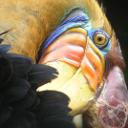

In [26]:
#Lab 3
#Question 2
from IPython.display import Image
print("Téléchargement de la photo sur laquelle on va travailler")
Image("bird_small.jpg")

In [6]:
def CalculInformationMutuelle(x, y):
    sum_mi = 0.0
    x_value_list = np.unique(x)
    y_value_list = np.unique(y)
    Px = np.array([ len(x[x==xval])/float(len(x)) for xval in x_value_list ]) #P(x)
    Py = np.array([ len(y[y==yval])/float(len(y)) for yval in y_value_list ]) #P(y)
    for i in range(len(x_value_list)):
        if Px[i] ==0.:
            continue
        sy = y[x == x_value_list[i]]
        if len(sy)== 0:
            continue
        pxy = np.array([len(sy[sy==yval])/float(len(y))  for yval in y_value_list]) #p(x,y)
        t = pxy[Py>0.]/Py[Py>0.] /Px[i] # log(P(x,y)/( P(x)*P(y))
        sum_mi += sum(pxy[t>0]*np.log2( t[t>0]) ) # sum ( P(x,y)* log(P(x,y)/( P(x)*P(y)) )
    return sum_mi


import numpy as np
from PIL import Image
from scipy import *
image = Image.open('bird_small.tiff')
image.save('bird_small.jpg')
pix = np.array(image)
MatriceDesRouges=[]
MatriceDesVerts=[]
MatriceDesBleus=[]
for i in range(pix.shape[0]):
    for j in range(pix.shape[1]):
        MatriceDesRouges.append(pix[i][j][0])
        MatriceDesVerts.append(pix[i][j][1])
        MatriceDesBleus.append(pix[i][j][2])
print("A titre d'exemple voici le premier pixel de l'image et le premier element de chacune des 3 matrices")
print(pix[0][0])
print("\nmatrice rouge :",MatriceDesRouges[0])
print("matrice verte :",MatriceDesVerts[0])
print("matrice bleue :",MatriceDesBleus[0])

print("\nCalculons maintenant l'information mutuelle entre les matrices à l'aide de la fonction de la question 1")

print("\nVoici I(R,G) = ",CalculInformationMutuelle(np.array(MatriceDesRouges),np.array(MatriceDesVerts)))
print("\nVoici I(B,G) = ",CalculInformationMutuelle(np.array(MatriceDesBleus),np.array(MatriceDesVerts)))
print("\nVoici I(R,B) = ",CalculInformationMutuelle(np.array(MatriceDesRouges),np.array(MatriceDesBleus)))

print("\nRemarque : On voit que la pair Rouge/Bleu partage la plus petite information mutuelle")

A titre d'exemple voici le premier pixel de l'image et le premier element de chacune des 3 matrices
[219 180 103]

matrice rouge : 219
matrice verte : 180
matrice bleue : 103

Calculons maintenant l'information mutuelle entre les matrices à l'aide de la fonction de la question 1

Voici I(R,G) =  3.213008599719743

Voici I(B,G) =  2.874391980992868

Voici I(R,B) =  2.6495812228897795

Remarque : On voit que la pair Rouge/Bleu partage la plus petite information mutuelle


### Question 3
Maintenant, on va appliquer ce qui a été fait sur l'image du lab 2.

D'abord on va refaire ce qu'on a fait dans la question 2, mais cette fois-ci, on va appliquer la fonction calculInformationMutuelle(x,y) sur  les matrices Rouge Bleu Verte et le cluster des labels calculé dans le lab 2.

In [8]:
def CalculInformationMutuelle(x, y):
    sum_mi = 0.0
    x_value_list = np.unique(x)
    y_value_list = np.unique(y)
    Px = np.array([ len(x[x==xval])/float(len(x)) for xval in x_value_list ]) #P(x)
    Py = np.array([ len(y[y==yval])/float(len(y)) for yval in y_value_list ]) #P(y)
    for i in range(len(x_value_list)):
        if Px[i] ==0.:
            continue
        sy = y[x == x_value_list[i]]
        if len(sy)== 0:
            continue
        pxy = np.array([len(sy[sy==yval])/float(len(y))  for yval in y_value_list]) #p(x,y)
        t = pxy[Py>0.]/Py[Py>0.] /Px[i] # log(P(x,y)/( P(x)*P(y))
        sum_mi += sum(pxy[t>0]*np.log2( t[t>0]) ) # sum ( P(x,y)* log(P(x,y)/( P(x)*P(y)) )
    return sum_mi

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

n_colors = 16
MatriceDesRouges=[]
MatriceDesVerts=[]
MatriceDesBleus=[]
image = Image.open('bird_small.jpg')

image = np.array(image, dtype=np.float64) / 255
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        MatriceDesRouges.append(image[i][j][0])
        MatriceDesVerts.append(image[i][j][1])
        MatriceDesBleus.append(image[i][j][2])
        
w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))

image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
labels = kmeans.predict(image_array)
print("\nVoici I(R,Labels) = ",CalculInformationMutuelle(np.array(MatriceDesRouges),labels))
print("\nVoici I(G,Labels) = ",CalculInformationMutuelle(np.array(MatriceDesVerts),labels))
print("\nVoici I(B,Labels) = ",CalculInformationMutuelle(np.array(MatriceDesBleus),labels))


Predicting color indices on the full image (k-means)

Voici I(R,Labels) =  2.4170687355824048

Voici I(G,Labels) =  2.5560699581878468

Voici I(B,Labels) =  2.1642062879212998
